In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/AI4E_ML01'

/content/drive/MyDrive/AI4E_ML01


In [ ]:
!ls

'HW_W6_Support Vector Machine_Thao.ipynb'
 linear.csv
 nonLinear.csv
 sample.csv
 WA_Fn-UseC_-Telco-Customer-Churn.csv
 weather_forecast.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', engine='c')
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

# **EDA**

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges']


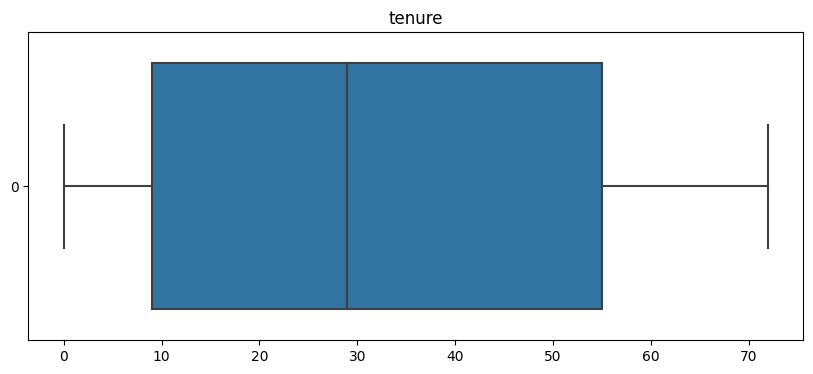

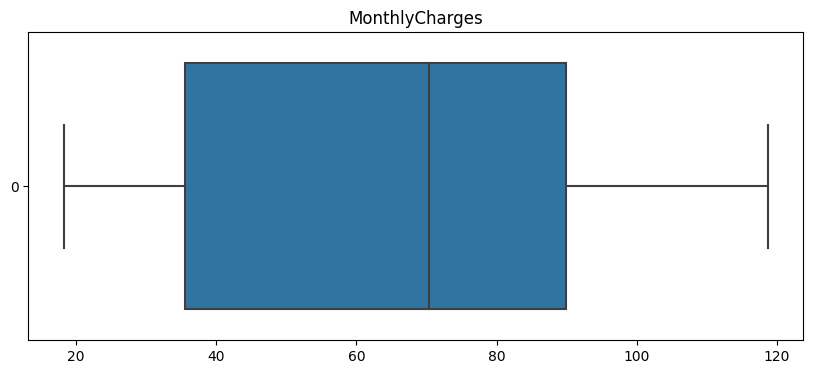

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title(i)
    sns.boxplot(df, orient= "horizontal")
    plt.show()

for i in numerical_cols:
    Box_plots(df[i])

Encoding, changing catergorical to numeric data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in df.columns if i not in df.describe().columns]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
customerID  :  [5375 3962 2564 ... 3367 5934 2226]  =  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mail

In [ ]:
df_graph = df1.drop("Churn", axis = 1)

In [ ]:
churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T
difference = not_churn - churn

In [ ]:
difference = difference.drop('Churn')
churn = churn.drop("Churn")
not_churn = not_churn.drop("Churn")
cmap = sns.color_palette("RdYlGn", as_cmap=True)
#White color palette
white_palette = sns.color_palette("Greys", as_cmap=True)

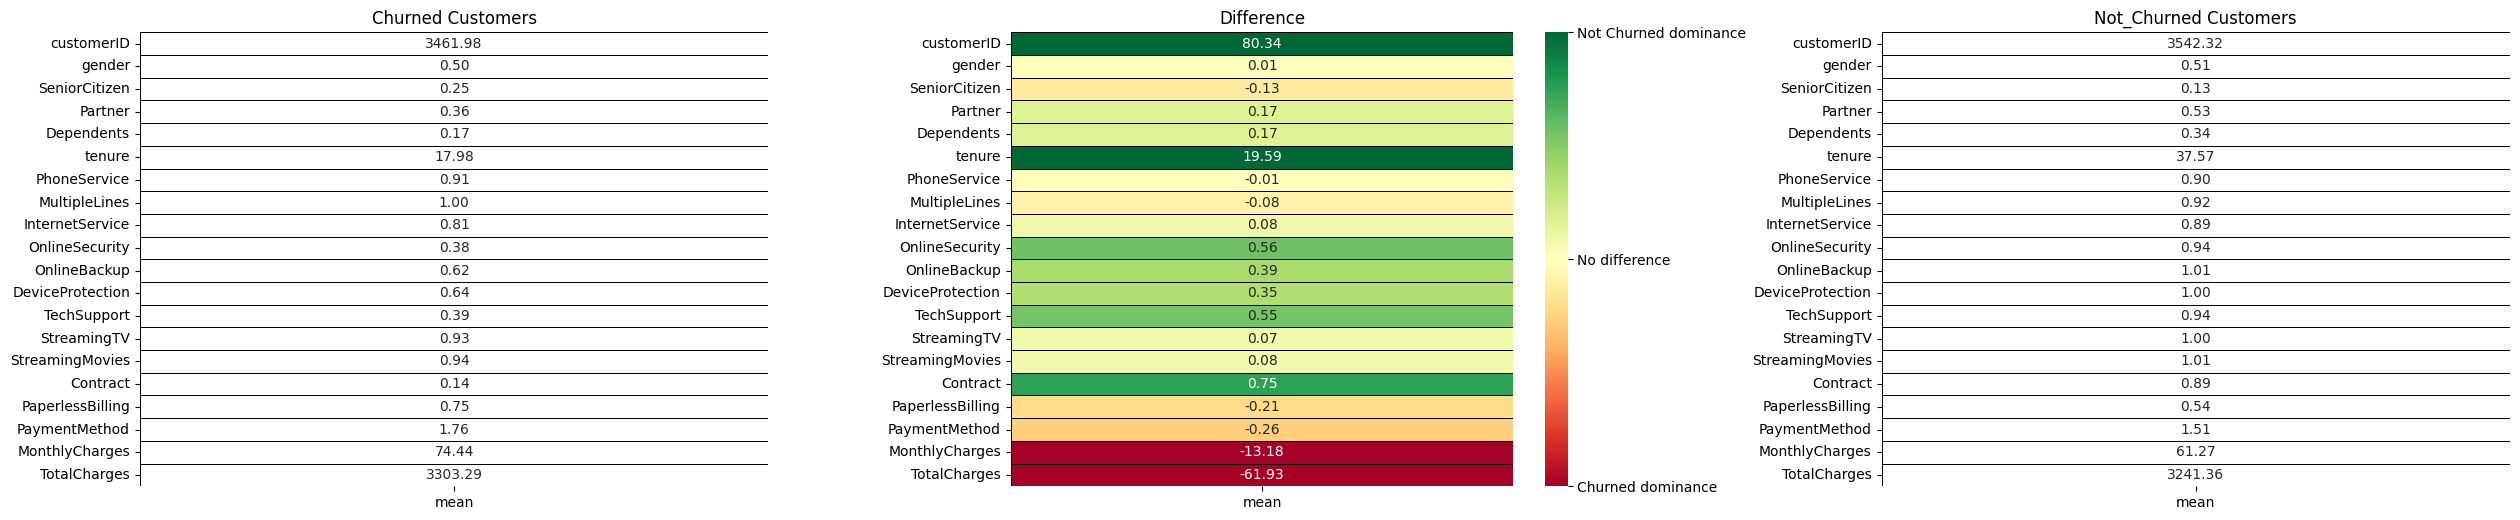

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
plt.subplot(1, 3, 1)
sns.heatmap(churn[['mean']], annot=True, cmap=white_palette, vmin=0, vmax = 1000000, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Churned Customers');
plt.subplot(1, 3, 2)
heatmap = sns.heatmap(difference[['mean']], annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.4, linecolor='black', cbar_kws={"orientation": "vertical", "ticks": [-1, 0, 1]}, fmt='.2f')
plt.title('Difference');
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, 0, 1])
cbar.set_ticklabels(['Churned dominance', 'No difference', 'Not Churned dominance'])

plt.subplot(1, 3, 3)
sns.heatmap(not_churn[['mean']], annot=True, cmap=white_palette, linewidths=0.4, vmin=0, vmax = 1000000, linecolor='black', cbar=False, fmt='.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad=0)

# **Modelling**

In [ ]:
df1.head(10)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   
5        6551       0              0        0           0       8   
6        1002       1              0        0           1      22   
7        4770       0              0        0           0      10   
8        5604       0              0        1           0      28   
9        4534       1              0        0           1      62   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   
5             1              2                1               0  ...   
6             1              2                1               0  ...   
7             0              1                0               2  ...   
8             1              2                1               0  ...   
9             1              0                0               2  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   
5                 2            0            2                2         0   
6                 0            0            2                0         0   
7                 0            0            0                0         0   
8                 2            2            2                2         0   
9                 0            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1  
5                 1              2           99.65          6104      1  
6                 1              1           89.10          1550      0  
7                 0              3           29.75          2609      0  
8                 1              2          104.80          2646      1  
9                 0              0           56.15          3022      0  

[10 rows x 21 columns]

In [ ]:
df=df1.drop(columns =['customerID'],axis = 1)

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 22, stratify=y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import KFold

In [ ]:
svc_model = SVC(random_state = 22)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)


SVM accuracy is : 0.73450070989115


In [ ]:
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85      2113
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2113
   macro avg       0.50      0.37      0.42      2113
weighted avg       1.00      0.73      0.85      2113



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Tuning**

In [ ]:
validation_size = 0.20
seed = 22
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)
num_folds = 10
scoring = 'accuracy'

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.799441 using {'C': 0.5, 'kernel': 'linear'}
0.799085 (0.018332) with: {'C': 0.1, 'kernel': 'linear'}
0.776715 (0.009028) with: {'C': 0.1, 'kernel': 'poly'}
0.785595 (0.014826) with: {'C': 0.1, 'kernel': 'rbf'}
0.799262 (0.015154) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.799086 (0.018152) with: {'C': 0.3, 'kernel': 'linear'}
0.785416 (0.012310) with: {'C': 0.3, 'kernel': 'poly'}
0.792518 (0.015758) with: {'C': 0.3, 'kernel': 'rbf'}
0.769973 (0.013438) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.799441 (0.018226) with: {'C': 0.5, 'kernel': 'linear'}
0.785412 (0.014821) with: {'C': 0.5, 'kernel': 'poly'}
0.792163 (0.015211) with: {'C': 0.5, 'kernel': 'rbf'}
0.753283 (0.009163) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.799441 (0.018226) with: {'C': 0.7, 'kernel': 'linear'}
0.787011 (0.012772) with: {'C': 0.7, 'kernel': 'poly'}
0.792342 (0.015549) with: {'C': 0.7, 'kernel': 'rbf'}
0.749029 (0.012973) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.799441 (0.018226) with: {'C': 0.9, 'kernel': 'line